In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("haberman.csv")

In [3]:
# How Many datapoints and Features present
data.shape

(306, 4)

In [4]:
# What are the Column name in are dataset
data.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [5]:
# What are the number of survivals or not
data["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

## Scatter Plots:

### We have three features age,year,nodes. Status classify that whether a person survived or not. So for ploting we can have 3C2 combinations means total of 3 plots.

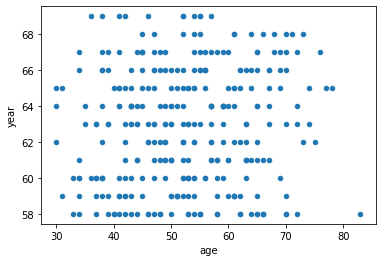

In [6]:
data.plot(kind = "scatter",x ="age",y="year")
plt.show()

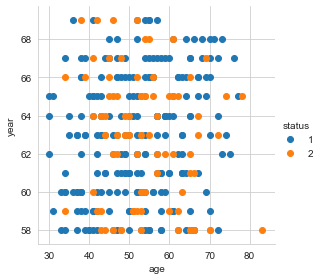

In [7]:
sns.set_style("whitegrid")
sns.FacetGrid(data,hue="status",height = 4).map(plt.scatter,"age","year").add_legend()
plt.show()

# We cannot differentiate easily who survived or not by using a single line in age vs year graph 
#so this combination of these features cannot contribute to our cancer prediction 

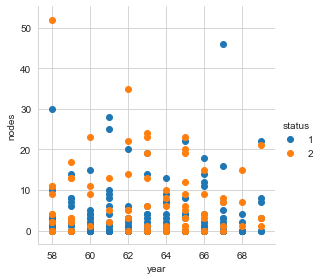

In [8]:
sns.set_style("whitegrid")
sns.FacetGrid(data,hue="status",height = 4).map(plt.scatter,"year","nodes").add_legend()
plt.show()

# using this scatter plot we cannot draw conclusion that year of operation and no. of nodes affect survivabilty of human
#

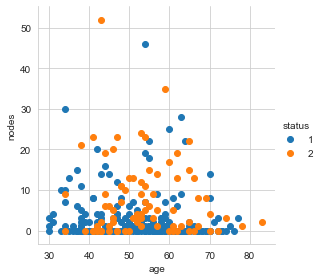

In [9]:
sns.set_style("whitegrid")
sns.FacetGrid(data,hue="status",height = 4).map(plt.scatter,"age","nodes").add_legend()
plt.show()

### Observation: We cannot differentiate who survive or no using age,nodes,year features

## Pair Plots:

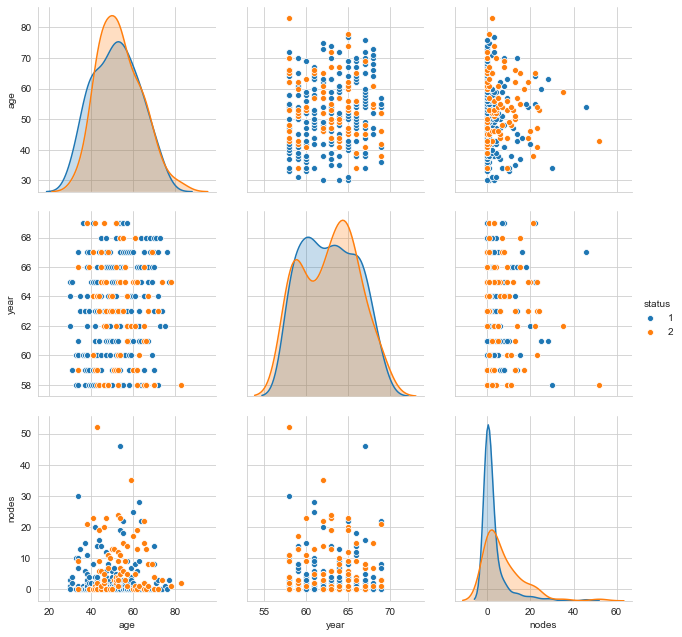

In [10]:
sns.set_style('whitegrid')
sns.pairplot(data, hue='status', vars=['age', 'year', 'nodes'], height=3)
plt.show()

## Histogram,PDF,CDF

In [27]:
import numpy as np

status_1 = data.loc[data["status"] == 1]
status_2 = data.loc[data["status"] == 2]

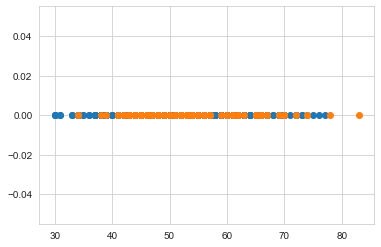

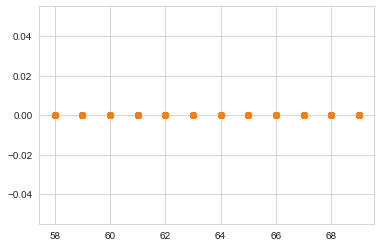

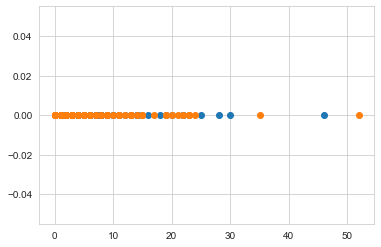

In [29]:
plt.plot(status_1["age"],np.zeros_like(status_1['age']),'o')
plt.plot(status_2["age"],np.zeros_like(status_2['age']),'o')

plt.show()


plt.plot(status_1["year"],np.zeros_like(status_1['year']),'o')
plt.plot(status_2["year"],np.zeros_like(status_2['year']),'o')

plt.show()


plt.plot(status_1["nodes"],np.zeros_like(status_1['nodes']),'o')
plt.plot(status_2["nodes"],np.zeros_like(status_2['nodes']),'o')

plt.show()

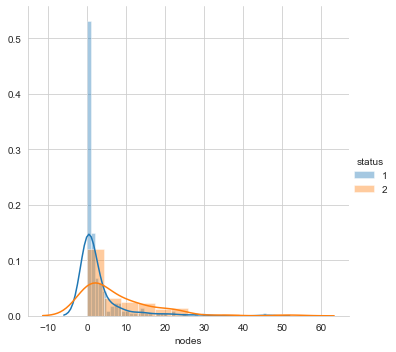

In [31]:
# to Plot a histogram

sns.FacetGrid(data,hue='status',height= 5).map(sns.distplot,"nodes").add_legend()
plt.show()

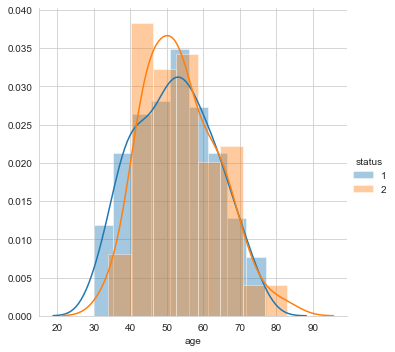

In [32]:
sns.FacetGrid(data,hue='status',height= 5).map(sns.distplot,"age").add_legend()
plt.show()

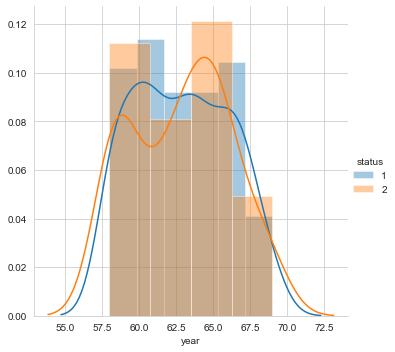

In [33]:
sns.FacetGrid(data,hue='status',height= 5).map(sns.distplot,"year").add_legend()
plt.show()

## Pdf CDf 

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


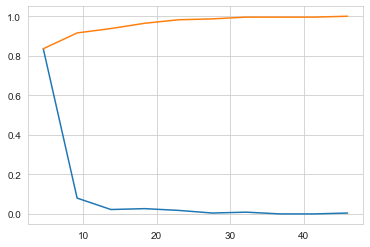

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


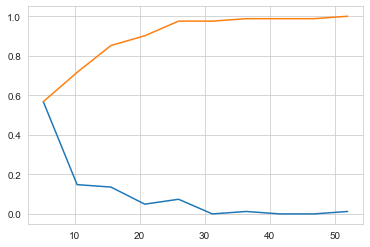

In [35]:
counts, bin_edges = np.histogram(status_1["nodes"],bins = 10,density = True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

# compute Cdf

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()


counts, bin_edges = np.histogram(status_2["nodes"],bins = 10,density = True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

# compute Cdf

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()




## Mean, Variance ,Std - dev

In [37]:
print("Means:")

print(np.mean(status_1["age"]))
print(np.mean(status_1["year"]))
print(np.mean(status_1["nodes"]))


print(np.mean(status_2["age"]))
print(np.mean(status_2["year"]))
print(np.mean(status_2["nodes"]))

print("Std - DEv:")

print(np.std(status_1["age"]))
print(np.std(status_1["year"]))
print(np.std(status_1["nodes"]))


print(np.std(status_2["age"]))
print(np.std(status_2["year"]))
print(np.std(status_2["nodes"]))

Means:
52.01777777777778
62.86222222222222
2.7911111111111113
53.67901234567901
62.82716049382716
7.45679012345679
Std - DEv:
10.98765547510051
3.2157452144021956
5.857258449412131
10.10418219303131
3.3214236255207883
9.128776076761632


## Median, Quantiles, Percentiles, Mean Absolute Deviation

In [46]:
print("Median: ")
print(np.median(status_1["nodes"]))

print(np.median(status_2["nodes"]))

Median: 
0.0
4.0


In [42]:
print("Quantiles:")

print(np.percentile(status_1["nodes"],np.arange(0,100,25)))
print(np.percentile(status_2["nodes"],np.arange(0,100,25)))

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]


In [44]:
print("90 percentiles:")
print(np.percentile(status_1["nodes"],90))
print(np.percentile(status_2["nodes"],90))

90 percentiles:
8.0
20.0


In [45]:
# MAD:
from statsmodels import robust
print("Mean Absolute Deviation:")

print(robust.mad(status_1["nodes"]))
print(robust.mad(status_2["nodes"]))

Mean Absolute Deviation:
0.0
5.930408874022408


## Box-Plots with Whiskers

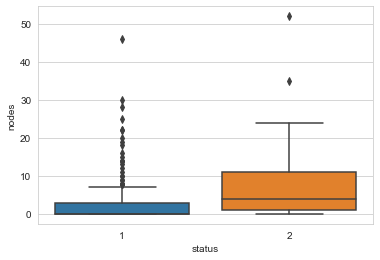

In [48]:
sns.boxplot(x='status',y = 'nodes',data = data)
plt.show()

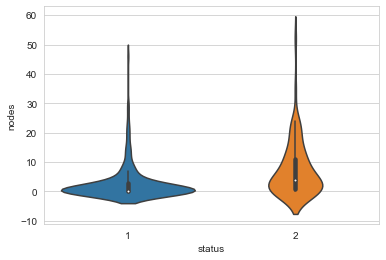

In [51]:
# Violin plots

sns.violinplot(x='status',y = 'nodes',data = data,size=8)
plt.show()

In [ ]:
sns.jointplot(x='status',y = 'nodes',data = data)